In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, LassoLars, Ridge, LinearRegression, Lasso





In [15]:
# Load data from path
TimeConstraint = pd.read_csv("data/time_constraint.csv")

D_rt_none = pd.read_pickle("data/170408-2141-rt-none.pkl")
D_rt_nginx = pd.read_pickle("data/170408-2154-rt-nginxlb.pkl")
D_rt_socat = pd.read_pickle("data/170408-2206-rt-socat.pkl")
D_rt_redir = pd.read_pickle("data/170408-2232-rt-squid.pkl")
D_rt_nginx_socat_redir = pd.read_pickle("data/170409-0718-rt-nginxlb-socat-squid.pkl")
D_rt_socat_redir_nginx = pd.read_pickle("data/170409-1606-rt-socat-squid-nginxlb.pkl")
D_rt_redir_nginx_socat = pd.read_pickle("data/170410-0054-rt-squid-nginxlb-socat.pkl")


In [16]:
def main():
    print("NFV Data Visualization")
    print(TimeConstraint.head())
    print("Info")
    print(TimeConstraint.info())
    print("Describe")
    print(TimeConstraint.describe())
    TimeConstraint.drop(['repetition_id'],inplace=True, axis=1)
    f, ax = plt.subplots(3, figsize=(12,18))
    sns.distplot(TimeConstraint.vnf1cpu, color='c', ax=ax[0])
    sns.distplot(TimeConstraint.vnf2cpu, color='c', ax=ax[1])
    sns.distplot(TimeConstraint.throughput_kbyte_per_second, color='c', ax=ax[2])

    corr = TimeConstraint.corr()
    plt.figure(figsize=(15,20))
    ax = sns.heatmap(
                 corr,
                 vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True
                 )
    ax.set_xticklabels(
                   ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right'
                   )
    plt.show()

    le = LabelEncoder()
    TimeConstraint.topology = le.fit_transform(TimeConstraint.topology)
    TimeConstraint.info()

    x = TimeConstraint.drop('throughput_kbyte_per_second',axis=1)
    y = TimeConstraint.throughput_kbyte_per_second

    x_train,x_, y_train,y_ = train_test_split(x,y,test_size=0.15,random_state=25)
    x_dev,x_test,y_dev,y_test = train_test_split(x_,y_,test_size=0.5,random_state=25)

    sc = StandardScaler()
    sc.fit(x_train)
    sc.transform(x_train)
    sc.transform(x_dev)

    clf = LinearRegression()
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

    clf = ElasticNet(alpha=1)
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))
    
    clf = Ridge(alpha=10)
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

    clf = LassoLars(alpha=1)
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))
    
    
    poly = PolynomialFeatures(2)
    x_train = poly.fit_transform(x_train)
    x_dev = poly.fit_transform(x_dev)
    
    clf = LinearRegression()
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))
    
    clf = Lasso(alpha=30,max_iter=5000)
    clf.fit(x_train,y_train)
    print('Training score: {:0.3f}'.format(r2_score(y_train,clf.predict(x_train))))
    print('Training MSE: {:0.3f}'.format(mean_squared_error(y_train,clf.predict(x_train))))
    print('Dev set score: {:0.3f}'.format(r2_score(y_dev,clf.predict(x_dev))))
    print('Dev set MSE: {:0.3f}'.format(mean_squared_error(y_dev,clf.predict(x_dev))))
    print('Coefficients: {}\n Intercept: {}'.format(clf.coef_,clf.intercept_))

NFV Data Visualization
   id  topology  repetition_id  vnf1cpu  vnf2cpu  vnf3cpu  \
0   0  nx-sc-sq              3     0.16     0.64     0.64   
1   1  nx-sc-sq              6     0.16     0.64     1.00   
2   2  nx-sc-sq              0     0.64     0.16     1.00   
3   3  nx-sc-sq              4     1.00     0.16     0.32   
4   4  nx-sc-sq              1     0.32     0.64     0.64   

   throughput_kbyte_per_second  
0                    134028.40  
1                    131123.94  
2                     71830.73  
3                     70274.05  
4                    289443.26  
Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 7 columns):
id                             2360 non-null int64
topology                       2360 non-null object
repetition_id                  2360 non-null int64
vnf1cpu                        2360 non-null float64
vnf2cpu                        2360 non-null float64
vnf3cpu                        2360 non-n

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


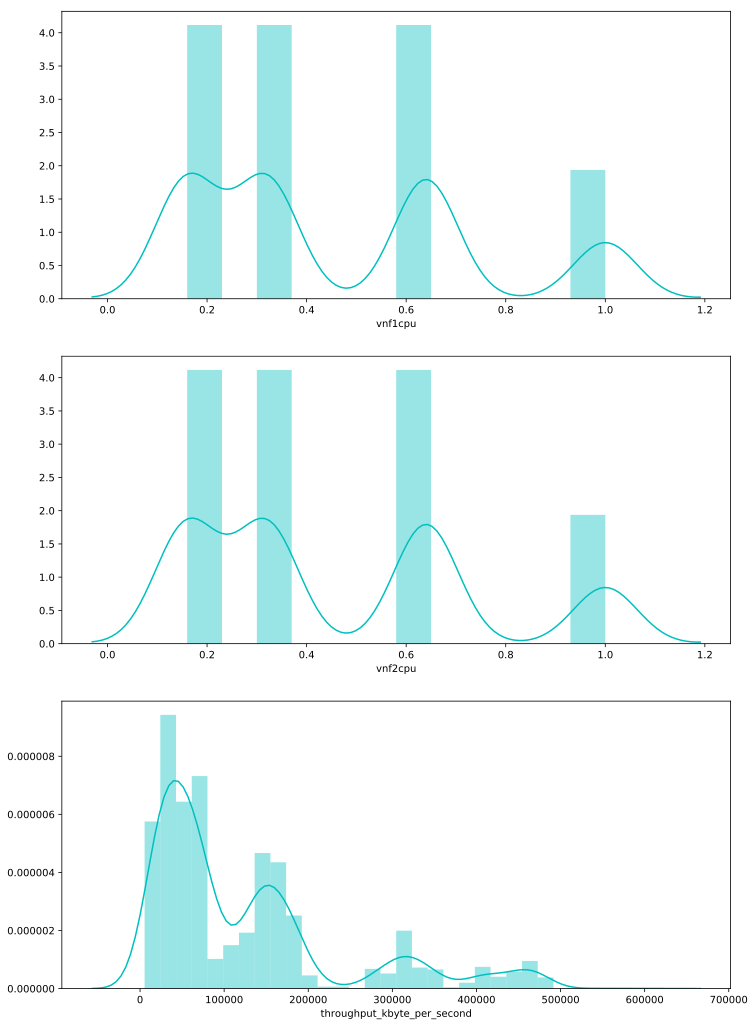

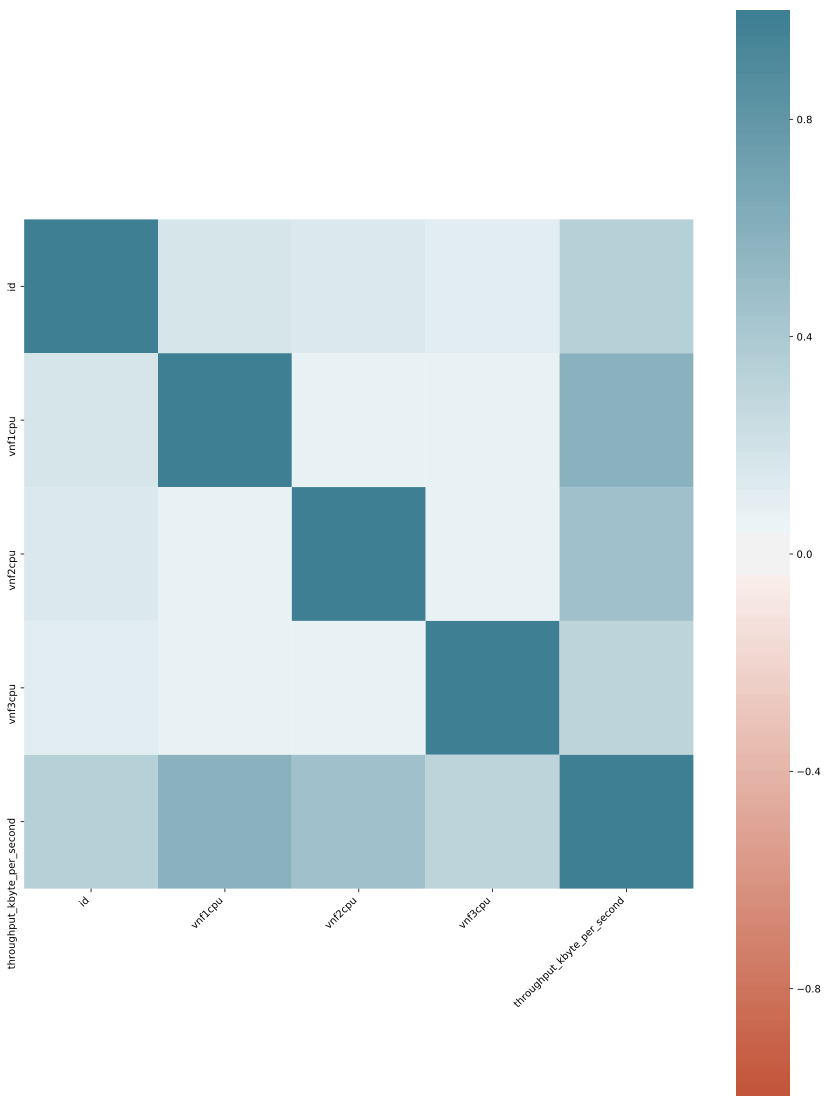

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360 entries, 0 to 2359
Data columns (total 6 columns):
id                             2360 non-null int64
topology                       2360 non-null int64
vnf1cpu                        2360 non-null float64
vnf2cpu                        2360 non-null float64
vnf3cpu                        2360 non-null float64
throughput_kbyte_per_second    2360 non-null float64
dtypes: float64(4), int64(2)
memory usage: 110.7 KB
Training score: 0.622
Training MSE: 5135471214.897
Dev set score: 0.560
Dev set MSE: 5335505559.067
Coefficients: [ 9.04434312e+01 -1.21942952e+04  2.00553637e+05  1.46877063e+05
  7.32462894e+04]
 Intercept: -64729.06156888571
Training score: 0.321
Training MSE: 9218290265.696
Dev set score: 0.339
Dev set MSE: 8026506878.930
Coefficients: [   161.24805003 -17519.79954354  28199.52678902  21153.04770575
  12079.14847297]
 Intercept: 94311.59721453642
Training score: 0.620
Training MSE: 5153460510.765
Dev set score: 0.563
D

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:41: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:42: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [17]:
main()